In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp             # 
from scipy.stats import shapiro                 # 정규성 검정
from scipy.stats import anderson                # 정규성 검정
from scipy.stats import wilcoxon                # 윌콕슨 순위 부호 검정(비모수 검정)
from scipy.stats import bartlett                # 등분산 검정
from scipy.stats import fligner                 # 등분산 검정
from scipy.stats import levene                  # 등분산 검정
from scipy.stats import ttest_ind               # 독립 표본 검정
from scipy.stats import ttest_rel               # 대응 표본 검정
from scipy.stats import mannwhitneyu, ranksums
from scipy.stats import chisquare               # 일원 카이제곱검정(카이제곱 적합도 검정)
from scipy.stats import chi2_contingency        # 카이제곱검정 
from scipy.stats import fisher_exact            # 피셔의 정확 검정

In [27]:
# dir(stats)

In [28]:
# help(stats)

# 1. 정규성 검정

**Question 01. 다음 데이터의 정규성을 검증하라.**

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
df.head()

,data
0,295.979767
1,289.703739
2,300.609670
3,299.890856
4,293.159612


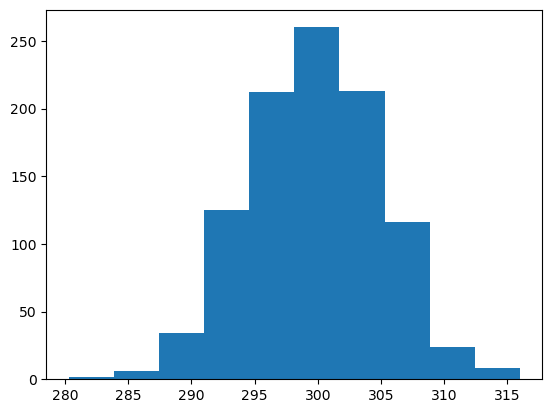

In [30]:
plt.hist(df)
plt.show()

In [31]:
print(shapiro(df))

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


shapiro 검정 시 p-value가 0.34이므로 유의수준 0.05에서 귀무가설(정규성을 가진다)을 기각할 수 없다.
 

**Question 02. 다음 데이터의 정규성을 검증하라.**

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
df.head()

,data
0,0.880145
1,-0.021619
2,0.509888
3,0.179442
4,0.493778


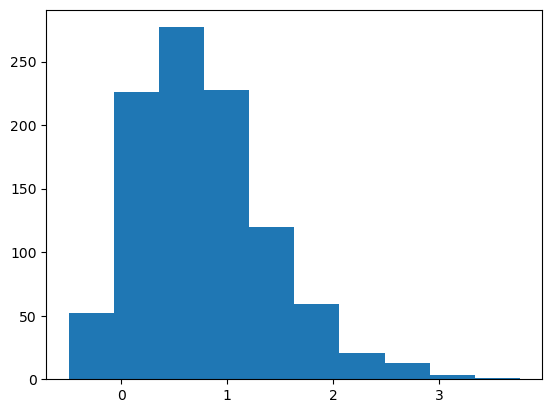

In [33]:
plt.hist(df)
plt.show()

In [34]:
print(shapiro(df))

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


shapiro 검정 시 p-value가 2.3e-16으로 0.05를 넘지 않으므로 유의수준 0.05에서 귀무가설(정규성을 가진다)을 기각하고, 대립가설을 채택한다.<br>
따라서 해당 데이터는 정규성을 가지지 않는다.

**Question 03. 위의 데이터를 log 변환한 후 정규성을 가지는지 확인하라.**

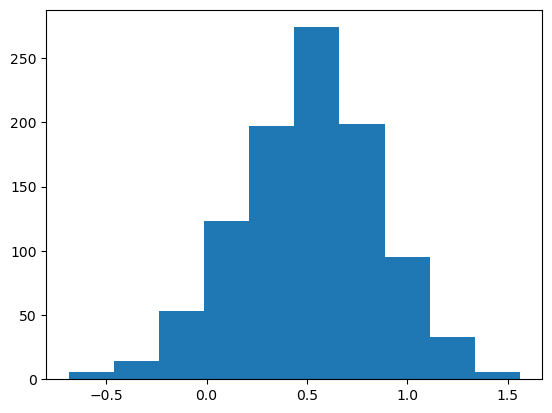

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_df = np.log1p(df)

plt.hist(log_df)
plt.show()

In [36]:
print(shapiro(log_df))

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


shapiro 검정 시 p-value가 0.17이므로 유의수준 0.05에서 귀무가설(정규성을 가진다)을 기각할 수 없다.

**Question 04. 다음 데이터의 정규성을 검증하라.**

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
df.head()

,data
0,296.016803
1,299.628476
2,298.232057
3,293.256749
4,301.037710


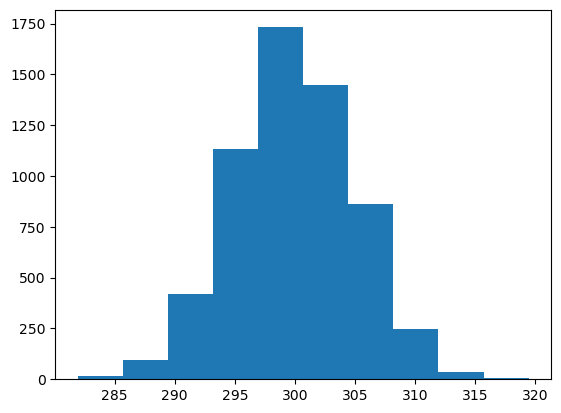

In [38]:
plt.hist(df)
plt.show()

In [39]:
print(shapiro(df))

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


C:\Users\futur\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


shapiro 검정 시 p-value가 0.15이므로 유의수준 0.05에서 귀무가설(정규성을 가진다)을 기각할 수 없다.<br>
하지만 경고 메세지에서도 보이듯이 5,000개가 초과하는 샘플에 대해서는 shapiro 검정은 정확하지 않을 수 있다.<br>
5,000개가 넘는 샘플에 대해서는 anderson 검정을 해주면 된다.

In [40]:
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


significance_level은 유의확률 값을 나타내며, critical_values는 각 유의확률 값의 기준점이 된다.<br>
유의수준 0.05에서 검정을 진행하려면 statistic 값인 0.82이 significance_level이 5.에 위치한 인덱스를 critical_values 값에서 비교하면 된다.<br>
그 값은 0.786이므로 statistic은 이보다 큰 0.826을 가지므로 귀무가설을 기각하고 대립가설을 채택한다.<br>
즉 해당 데이터는 정규성을 가지지 않는다고 판단한다(p-value와 기각 기준 부등호 개념이 반대이다).

# 2. 단일 표본 t검정 (one-sample)

**Question 06. 100명의 키 정보가 들어 있는 데이터가 있다. 데이터가 정규성을 만족하는지 확인하라.
그리고 평균 키를 165라 판단할 수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.**

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
df.head()

,height
0,160.237691
1,164.747324
2,165.401628
3,168.801627
4,153.199021


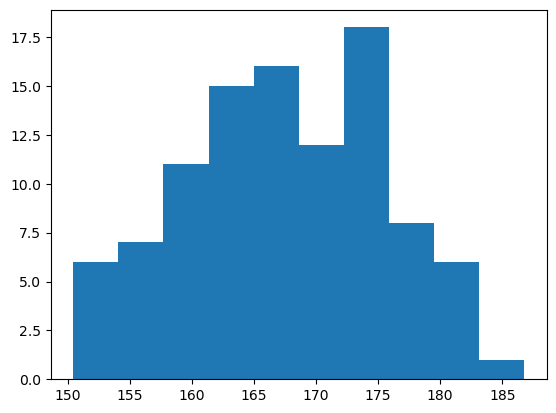

In [42]:
plt.hist(df)
plt.show()

In [45]:
# 정규성 검정 shapiro
static, pvalue = shapiro(df)
print(f'shapiro 정규성 검정 결과 p-value 값은 {pvalue} 이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.')
    
    # 윌콕슨 부호 순위 검정
    static, pvalue = wilcoxon(df['height']-165)
    
    if pvalue < 0.05:
        print(f'검정 결과 p-value는 {pvalue}이므로 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 p-value는 {pvalue}이므로 귀무가설을 기각하지 않는다.')    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일 표본 검정으로 확인한다.\n')
    print('단일 표본 t-test의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.')
    
    # 단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05:
        print(f'검정 결과 p-value는 {round(pvalue, 4)}이므로 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 p-value는 {round(pvalue, 4)}이므로 귀무가설을 기각하지 않는다.')

shapiro 정규성 검정 결과 p-value 값은 0.013552471995353699 이므로
귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.

윌콕슨 순위 부호 검정의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.
검정 결과 p-value는 0.04880534424649582이므로 귀무가설을 기각하고 대립가설을 채택한다.


In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')
df.head()

,height
0,182.012475
1,166.857081
2,159.633265
3,159.633265
4,169.428478


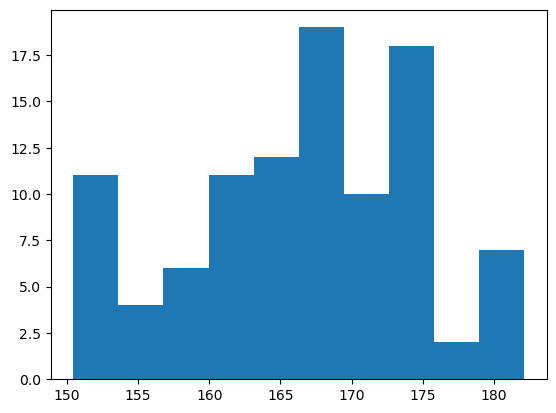

In [47]:
plt.hist(df)
plt.show()

In [48]:
# 정규성 검정 shapiro
static, pvalue = shapiro(df)
print(f'shapiro 정규성 검정 결과 p-value 값은 {pvalue} 이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.')
    
    # 윌콕슨 부호 순위 검정
    static, pvalue = wilcoxon(df['height']-165)
    
    if pvalue <0.05:
        print(f'검정 결과 p-value는 {pvalue}이므로 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 p-value는 {pvalue}이므로 귀무가설을 기각하지 않는다.')    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.')
    
    # 단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05:
        print(f'검정 결과 p-value는 {round(pvalue, 4)}이므로 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 p-value는 {round(pvalue, 4)}이므로 귀무가설을 기각하지 않는다.')

shapiro 정규성 검정 결과 p-value 값은 0.013552471995353699 이므로
귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.

윌콕슨 순위 부호 검정의 귀무가설은 "100명의 평균 키는 165이다"이며, 대립가설은 "100명의 평균 키는 165가 아니다."이다.
검정 결과 p-value는 0.04880534424649582이므로 귀무가설을 기각하고 대립가설을 채택한다.


# 3. 등분산 검정

- 등분산 검정 방법은 3가지가 있다.
- p-value 값은 유의수준 0.05보다 작은 경우 '각 그룹은 등분산이다.'라는 귀무가설을 기각한다.
- bartlett, fligner 두 검정은 nan값을 지우고 사용해야 한다. LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안 된다.

**Question 07. 두 개 학급의 시험 성적에 대한 데이터이다. 그룹 간 등분산 검정을 시행하라.**

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [50]:
a = df[df['class']=='A'].score
b = df[df['class']=='B'].score

print(bartlett(a, b))

print(fligner(a, b, center='median')) # default
print(fligner(a, b, center='mean'))
              
print(levene(a, b, center='median'))  # default
print(levene(a, b, center='mean'))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


위의 결과 모두 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [52]:
a = df[df['class']=='A'].score
b = df[df['class']=='B'].score

print(bartlett(a, b))

print(fligner(a, b, center='median')) # default
print(fligner(a, b, center='mean'))
              
print(levene(a, b, center='median'))  # default
print(levene(a, b, center='mean'))

BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
FlignerResult(statistic=4.94724457924667, pvalue=0.026132286002684912)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)


bartlett 검정 결과, p-value는 0.05보다 크고, fligner, levene 검정 결과 p-value는 0.05보다 작다.<br>
fligner, levene는 bartlett보다 좀 더 robust하다는 특징이 있다.

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [54]:
a = df['A'].values
b = df['B'].values

print(bartlett(a, b))

print(fligner(a, b, center='median')) # default
print(fligner(a, b, center='mean'))
              
print(levene(a, b, center='median'))  # default
print(levene(a, b, center='mean'))

BartlettResult(statistic=2.3832178811043527, pvalue=0.12264468401745829)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
FlignerResult(statistic=6.08420814282746, pvalue=0.01363954875460099)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)
LeveneResult(statistic=5.783103950473267, pvalue=0.016687980542371833)


BartlettResult는 등분산이며, FlignerResult, LeveneResult는 등분산이 아니다.

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    int64  
 1   B       180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [57]:
a = df['A'].dropna().values
b = df['B'].dropna().values

print(bartlett(a, b))

print(fligner(a, b, center='median')) # default
print(fligner(a, b, center='mean'))
              
print(levene(a, b, center='median'))  # default
print(levene(a, b, center='mean'))

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
FlignerResult(statistic=7.866701415553152, pvalue=0.005035342411464087)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)
LeveneResult(statistic=8.217541809462276, pvalue=0.004331841625789694)


BartlettResult는 등분산이며, FlignerResult, LeveneResult는 등분산이 아니다.

# 4. 독립 표본 t-검정 (Independent)

- 독립 표본 t-검정의 경우 집단의 정규성에 따라 접근 방식이 다르다.
- 정규성 검정은 shapiro, adnerson(샘플 5000개 이상)을 통해 확인한다.
- 데이터가 정규성을 가지는 경우 → 모수적 검정
- 데이터가 정규성을 가지지 않는 경우 → 비모수적 검정

**Quesiton 08. 두 개 학급의 시험 성적에 대한 데이터이다. 두 학습의 시험 평균(비모수 검정의 경우 중위값)은 동일하다고 말할 수 있는지 확인하라.**

In [58]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

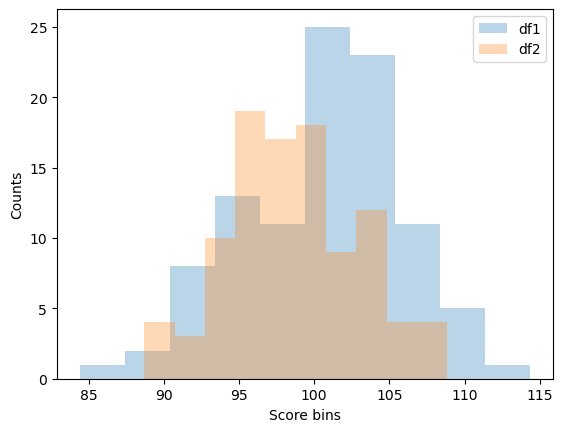

In [59]:
plt.hist(df1, label='df1', alpha=0.3)
plt.hist(df2, label='df2', alpha=0.3)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [60]:
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)


두 그룹 모두 shapiro 검정 결과, 귀무가설(정규성을 가진다)을 기각할 수 없다. 따라서 두 그룹은 정규성을 가진다.

In [61]:
print(levene(df1['data'], df2['data']))

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)


두 그룹은 levene 검정 결과, p-value가 0.11로 귀무가설을 기각하지 못한다. 따라서 등분산을 가진다.

In [62]:
print(ttest_ind(df1, df2, equal_var=True))

Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))


등분산이기 때문에 `equal_var=True` 파라미터를 주고, ttest_ind 모듈을 이용하여 t-test를 진행한다.<br>
p-value는 0.006이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다.

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    int64  
 1   B       180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


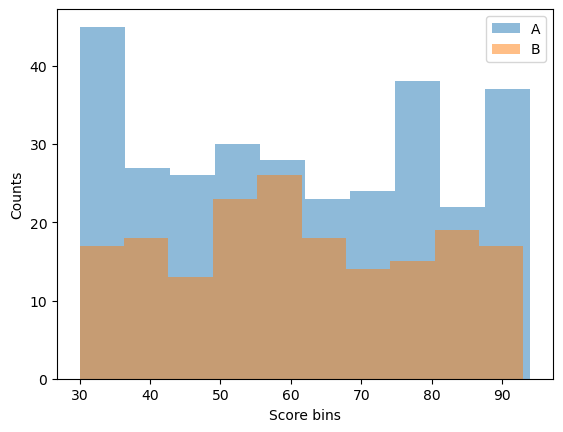

In [58]:
plt.hist(df['A'], alpha=0.5, label='A')
plt.hist(df['B'].dropna(), alpha=0.5, label='B')
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

데이터 분포 확인 결과, 정규성을 위배하는 것처럼 보인다.<br>
두 그룹 중 한 그룹만이라도 정규성을 위배해도 독립 표본 t-검정을 실행할 수 없다.

In [60]:
print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)


두 그룹 모두 shapiro 검정 결과, 귀무가설(정규성을 가진다)을 기각한다. 정규성을 위배하였으므로 비모수 검정을 실시해야 한다.

In [62]:
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


Mann-Whiteny U Test 검정 결과, p-value는 0.49 값이므로 귀무가설(평균이 같다)을 기각할 수 없다.
윌콕슨 순위합 검정(ranksums)으로 확인해봐도 같은 결과가 나온다.

**Question 09. 두 개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라.**

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')
df.head()

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730


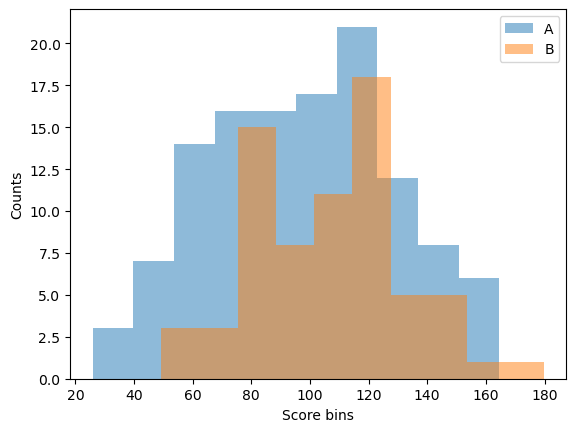

In [64]:
plt.hist(df[df['group']=='a'].data, label='A', alpha=0.5)
plt.hist(df[df['group']=='b'].data, label='B', alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [65]:
a = df[df['group']=='a'].data
b = df[df['group']=='b'].data

print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)


두 그룹 모두 귀무가설(정규성을 가진다)을 기각하지 못한다. 따라서 두 그룹은 정규성을 가진다.

In [66]:
print(levene(a, b))

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)


두 그룹은 levene 검정 결과 p-value가 0.013으로 귀무가설을 기각하고 대립가설을 채택한다. 따라서 두 그룹은 등분산이 아니다.

In [67]:
print(ttest_ind(a, b, equal_var=False))

Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898)


등분산이 아니기 때문에 `equal_var=False` 파라미터를 주고, ttest_ind 모듈을 이용해 t-test를 진행한다.<br>
p-value는 0.02이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다.<br>
결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며, 평균 또한 동일하다고 보기 어렵다.

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
df.head()

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       120 non-null    float64
 1   b       70 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


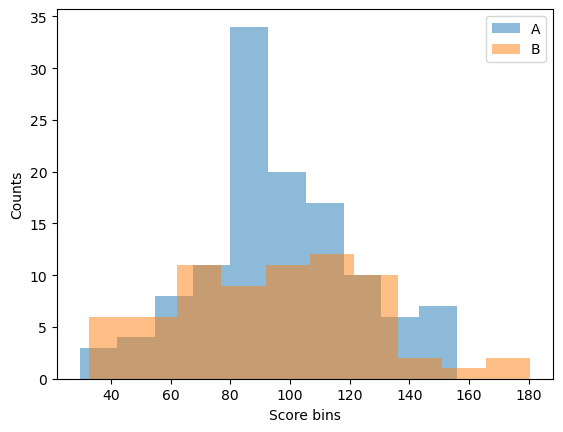

In [70]:
plt.hist(df['a'], label='A', alpha=0.5)
plt.hist(df['b'], label='B', alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [72]:
a = df['a'].dropna()
b = df['b'].dropna()

In [73]:
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)


두 그룹은 모두 shapiro 검정 결과, p-value가 0.05를 넘으므로 귀무가설(정규성을 가진다)을 채택한다. 따라서 두 그룹은 정규성을 가진다.

In [74]:
print(levene(a, b))

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)


두 그룹은 levene 검정 결과, p-value가 0.05보다 작으므로 귀무가설(등분산이다)을 기각하고 대립가설을 채택한다. 따라서 두 그룹은 등분산이 아니다.

In [75]:
print(ttest_ind(a, b, equal_var=False))

Ttest_indResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704)


등분산이 아니므로 `eqal_var=False` 파라미터를 주고, ttest_ind 모듈을 이용해 t-test를 진행한다.<br>
이때 p-value가 0.99이므로 귀무가설(각 그룹의 평균값은 동일하다)을 채택한다.<br>
따라서 두 그룹은 모두 정규성을 만족하나, 등분산은 아니며, 평균은 동일하다고 볼 수 있다.

# 5. 대응 표본 t-검정 (paried)

- 동일한 집단의 처치 전후 차이를 알아보기 위해 사용하는 검정 방법
- 대응 표본의 경우 등분산성이 파라미터에 영향을 주지 않는다.

**Question 10. 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라.**

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
df.head()

,before,after
0,216.289726,175.897620
1,190.279454,189.295934
2,217.744689,219.233935
3,235.021264,195.021021
4,234.098484,213.218227


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   before  120 non-null    float64
 1   after   120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


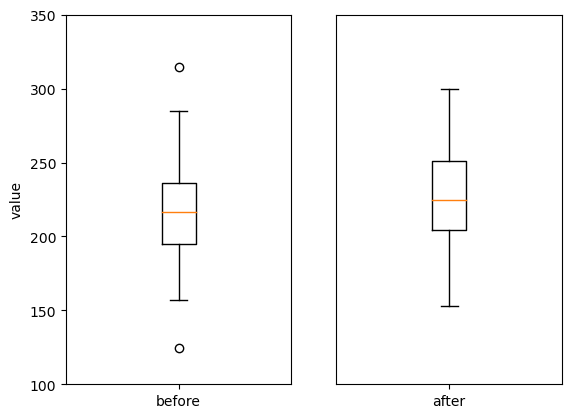

In [65]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [66]:
before = df['before']
after = df['after']

print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


두 그룹은 shapiro 검정 결과, p-value가 0.05를 넘으므로 귀무가설(정규성을 가진다)을 채택한다. 따라서 두 그룹은 정규성을 가진다.

In [67]:
print(levene(before, after))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)


두 그룹은 levene 검정 결과, p-value가 0.05를 넘으므로 귀무가설(등분산이다)을 채택한다. 따라서 두 그룹은 등분산이다.

In [68]:
print(ttest_rel(before, after))

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


두 그룹은 대응 표본 t 검정 결과, p-value가 0.05보다 작으므로 귀무가설(전 후 평균은 같다)을 기각하고 대립가설을 채택하게 된다. 따라서 투약 전 후 평균은 같지 않게 된다.

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')
df.head()

,before,after
0,253.566615,220.857837
1,195.080189,209.206667
2,228.299690,173.070057
3,279.417367,222.356980
4,230.062210,248.371045


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   before  120 non-null    float64
 1   after   120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


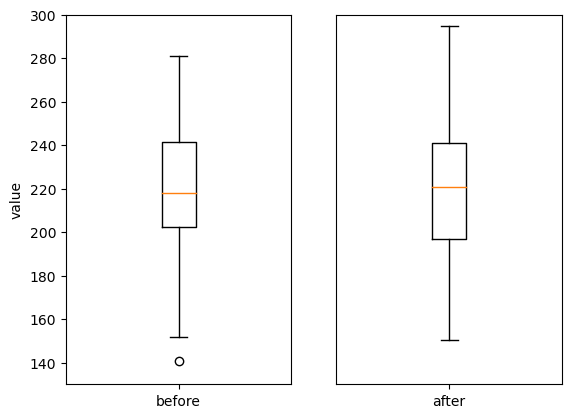

In [71]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [72]:
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


두 그룹은 shapiro 검정 결과, p-value가 0.05를 넘으므로 귀무가설(정규성을 가진다)을 채택한다. 따라서 두 그룹은 정규성을 가진다.

In [73]:
print(levene(before, after))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)


두 그룹은 levene 검정 결과, p-value가 0.05를 넘으므로 귀무가설(등분산이다)을 채택한다. 따라서 두 그룹은 등분산을 가진다.

In [74]:
print(ttest_rel(before, after))

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


대응 표본 t-검정 결과, p-value가 0.05보다 작으므로 귀무가설(전 후 평균이 같다)을 기각한다.<br>
따라서 투약 전 후 평균은 같지 않다.

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')
df.head()

,before,after
0,253.566615,220.857837
1,195.080189,209.206667
2,228.299690,173.070057
3,279.417367,222.356980
4,230.062210,248.371045


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   before  120 non-null    float64
 1   after   120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


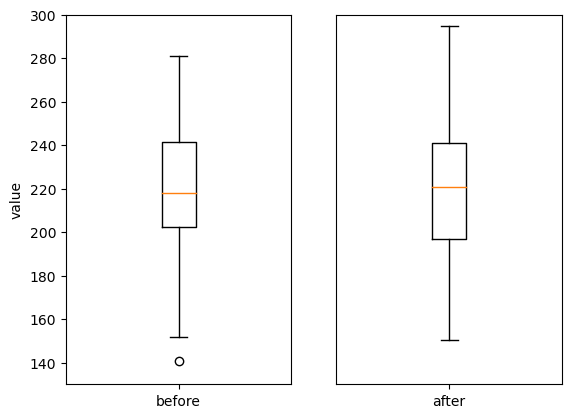

In [103]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [104]:
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


두 그룹 모두 p-value가 0.05를 넘으므로 귀무가설을 채택한다. 따라서 정규성을 만족한다.

In [105]:
print(levene(before, after))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)


levene 검정 결과 p-value가 0.05를 넘으므로 귀무가설을 채택한다. 따라서 등분산을 가진다.

In [106]:
print(ttest_rel(before, after))

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


p-value가 0.05를 넘으므로 귀무가설(전 후 평균은 같다)을 기각한다.<br>
따라서 투약 전 후 평균은 같지 않다.

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
df.head()

,before,after
0,153,162
1,153,163
2,158,159
3,157,158
4,167,160


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   before  50 non-null     int64
 1   after   50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


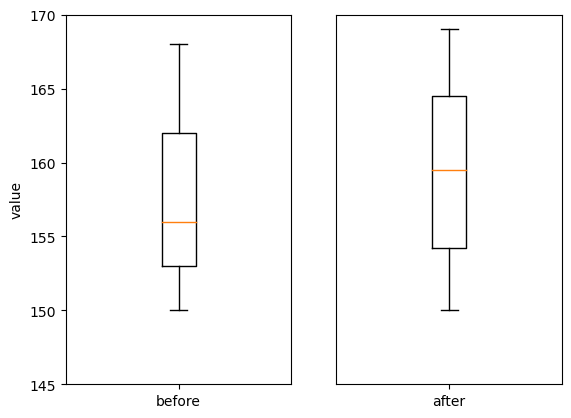

In [110]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [111]:
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


두 그룹 모두 p-value가 0.05를 넘으므로 귀무가설을 채택한다. 따라서 정규성을 가진다.

In [112]:
print(levene(before, after))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)


levene 검정 결과 p-value가 0.05를 넘으므로 귀무가설을 채택한다. 따라서 등분산을 가진다.

In [113]:
print(ttest_rel(before, after))

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


p-vlaue가 0.05를 넘지 않으므로 귀무가설을 채택한다. 따라서 투약 전 후 평균은 같다.

In [114]:
print(wilcoxon(before, after))

WilcoxonResult(statistic=2577.0, pvalue=0.005821508354384096)


p-value가 0.05를 넘지 않으므로 귀무가설을 기각하고 대립가설을 채택한다. 따라서 투약 전 후 평균은 같지 않다.

**Question 11. 한 기계 부품의 rpm 수치를 두 가지 다른 상황에서 측정했다(총 70세트). b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라.**

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')
df.head()

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rpm     140 non-null    float64
 1   group   140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


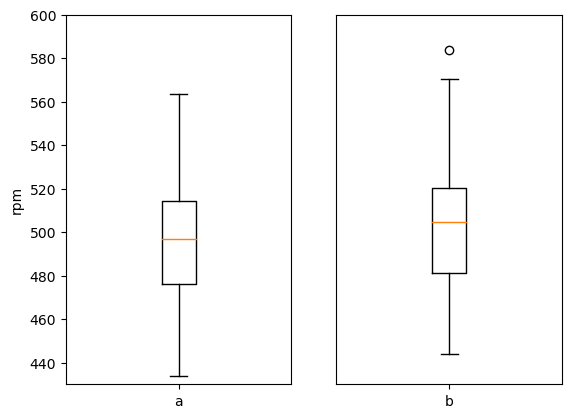

In [139]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [140]:
a = df[df['group']=='a'].rpm
b =  df[df['group']=='b'].rpm

print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)


귀무가설을 기각하지 못하므로 정규성을 가진다.

In [141]:
print(levene(a, b))

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)


귀무가설을 기각하지 못하므로 등분산을 가진다.

In [142]:
print(ttest_rel(b, a, alternative='greater')) # greater의 의미는 a>b가 대립가설이 된다는 것

TtestResult(statistic=1.9018108294460812, pvalue=0.030685663464464715, df=69)


p-value가 0.05를 넘지 않으므로 귀무가설을 기각하고 대립가설을 채택한다. 따라서 b 상황이 a 상황보다 rpm 값이 높다고 할 수 있다.

# 6. 카이제곱 검정 (교차분석)

- **일원 카이제곱검정(chisquare, 카이제곱 적합도 검정)**
  - 한 개의 요인에 의해 k개의 범주를 가질 때 이론적 분포를 따르는지에 대한 검정
- **이원 카이제곱검정(chi2_contingency, fisher_exact(빈도수 5개 이하 셀이 20% 이상일 때), 카이제곱독립검정)**
  - 모집단이 두 개의 변수에 의해 범주화되었을 때 두 변수들 사이의 관계가 독립인지 아닌지 검정

**Question 12. 144회 주사위를 던졌을 때, 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라.**

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
df.head()

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   dice_number  6 non-null      int64
 1   counts       6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


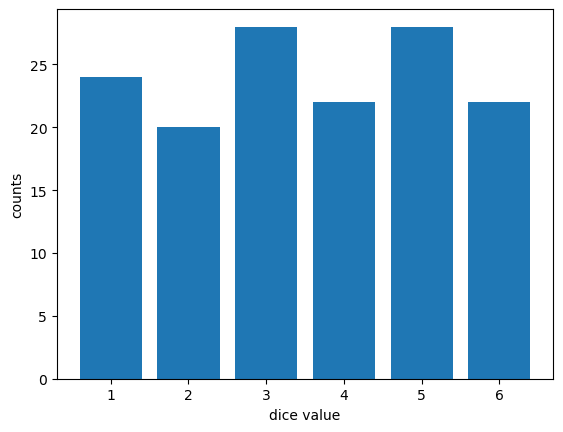

In [123]:
plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [124]:
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts, df.expected)) 

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


p-value가 0.05를 넘지 않으므로 귀무가설을 채택한다. 따라서 각 주사위 눈금 발생 비율을 동일하다고 할 수 있다.

**Question 13. 다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라.**

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hands   500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


데이터에서 알려진 비율로 계산된 기댓값을 구하여 카이제곱검정을 시행한다.

In [127]:
target = df.hands.value_counts().to_frame()
target['expected'] = [int(target.hands.sum()*0.8), int(target.hands.sum()*0.2)]
display(target)

,hands,expected
right,420,400
left,80,100


In [128]:
print(chisquare(target.hands, target.expected))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


p-value가 0.05를 넘지 않으므로 대립가설을 채택한다. 따라서 왼손과 오른손 잡이의 비율이 0.2, 0.8이라고 볼 수 없다.

**Question 14. 다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라.**

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13396 entries, 0 to 13395
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   측정나이              13396 non-null  float64
 1   측정회원성별            13396 non-null  object 
 2   신장 : cm           13396 non-null  float64
 3   체중 : kg           13396 non-null  float64
 4   체지방율 : %          13396 non-null  float64
 5   이완기혈압(최저) : mmHg  13396 non-null  float64
 6   수축기혈압(최고) : mmHg  13396 non-null  float64
 7   악력D : kg          13396 non-null  float64
 8   앉아윗몸앞으로굽히기 : cm   13396 non-null  float64
 9   교차윗몸일으키기 : 회      13396 non-null  float64
 10  제자리 멀리뛰기 : cm     13396 non-null  float64
 11  등급                13396 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [131]:
cdf = pd.crosstab(df['측정회원성별'] ,df['등급'])
display(cdf)

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


In [132]:
print(chi2_contingency(cdf))

chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


p-value가 0에 근접하므로 측정 회원 성별고하 등급은 연관이 없다는 귀무가설을 기각하고, 성별과 체력 등급 간에는 관련이 있다고 할 수 있다.

**Question 15. 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라.**

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [134]:
cdf = df.iloc[:-1,:-1]
display(cdf)

,불참,참석
남성,4,2
여성,1,9


In [135]:
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)
print(fisher_exact(cdf))

Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
0.07023259819117404
SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)


카이제곱 검정 시 p-value는 0.07로 귀무가설을 기각하지 못한다. 따라서 성별과 참석 여부는 관련이 없다(독립이다).<br>
하지만 5보다 작은 셀이 20%가 넘어가므로 피셔의 정확 검정을 사용해야 한다.<br>
피셔의 정확 검정 시 0.03의 값을 가지므로 귀무가설을 기각한다. 따라서 성별과 참석 여부는 관련이 있다(독립이 아니다).

# 참고